In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets with random sampling
def load_datasets(folder_path, transit_bucket, target_bucket, files_list, max_records=None, nrows=None):
    df_list = {}
    for file in files_list:
        try:
            df = pd.read_json(folder_path + transit_bucket + target_bucket + file, lines=True, nrows=nrows)
            total_records = df.shape[0]
            if max_records is not None:
                df = df.sample(n=min(max_records, total_records), random_state=42)  # Random sampling
            sampled_records = df.shape[0]
            print(f"Loaded {file}: {sampled_records}/{total_records} records sampled.")
            df_list[file] = df
        except Exception as e:
            print(f"Error loading {file}: {e}")
    return df_list

# Check for missing values
def check_missing_values(df, file_name):
    missing_values = df.isnull().sum()
    total_records = df.shape[0]
    missing_percentage = (missing_values / total_records) * 100

    print(f"\nMissing Values in {file_name}:")
    missing_info = pd.DataFrame({'Count': missing_values, 'Percentage': missing_percentage})
    print(missing_info[missing_info['Count'] > 0])
    return missing_info

# Data types and basic statistics
def basic_statistics(df, file_name):
    print(f"\nData Types for {file_name}:")
    print(df.dtypes)
    print(f"\nBasic Statistics for {file_name}:")
    print(df.describe(include='all'))

# Visualize distributions of numerical features
def plot_distributions(df, file_name):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    pic_count = len(numerical_cols)
    # plot 9 histograms at a time. If there are more than 9 numerical columns, plot them in multiple figures
    for i in range(0, pic_count, 9):
        print("plotting", i, "to", i+9)
        plt.figure(figsize=(15, 10))
        for j, col in enumerate(numerical_cols[i:i+9]):
            print("plotting", col)
            plt.subplot(3, 3, j+1)
            sns.histplot(df[col], kde=True)
            plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()

# Correlation matrix
def plot_correlation_matrix(df, file_name):
    # Filter numeric columns only
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        print(f"No numeric data available for correlation in {file_name}.")
        return

    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation Matrix for {file_name}')
    plt.show()

# Main function to evaluate the datasets
def evaluate_datasets(folder_path, transit_bucket, target_bucket, files_list, max_records=None, nrows=None):
    df_list = load_datasets(folder_path, transit_bucket, target_bucket, files_list, max_records, nrows)
    
    for file_name, df in df_list.items():
        if df is not None:
            check_missing_values(df, file_name, )
            basic_statistics(df, file_name)
            plot_distributions(df, file_name)
            plot_correlation_matrix(df, file_name)



Loaded yelp_academic_dataset_business.json: 10000/50000 records sampled.
Loaded yelp_academic_dataset_review.json: 10000/50000 records sampled.
Loaded yelp_academic_dataset_user.json: 10000/50000 records sampled.
Loaded yelp_academic_dataset_checkin.json: 10000/50000 records sampled.
Loaded yelp_academic_dataset_tip.json: 10000/50000 records sampled.
Error loading yelp_academic_dataset_photo.json: File ../data/raw_datasets/yelp/yelp_academic_dataset_photo.json does not exist

Missing Values in yelp_academic_dataset_business.json:
            Count  Percentage
attributes    889        8.89
categories      6        0.06
hours        1542       15.42

Data Types for yelp_academic_dataset_business.json:
business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
cat

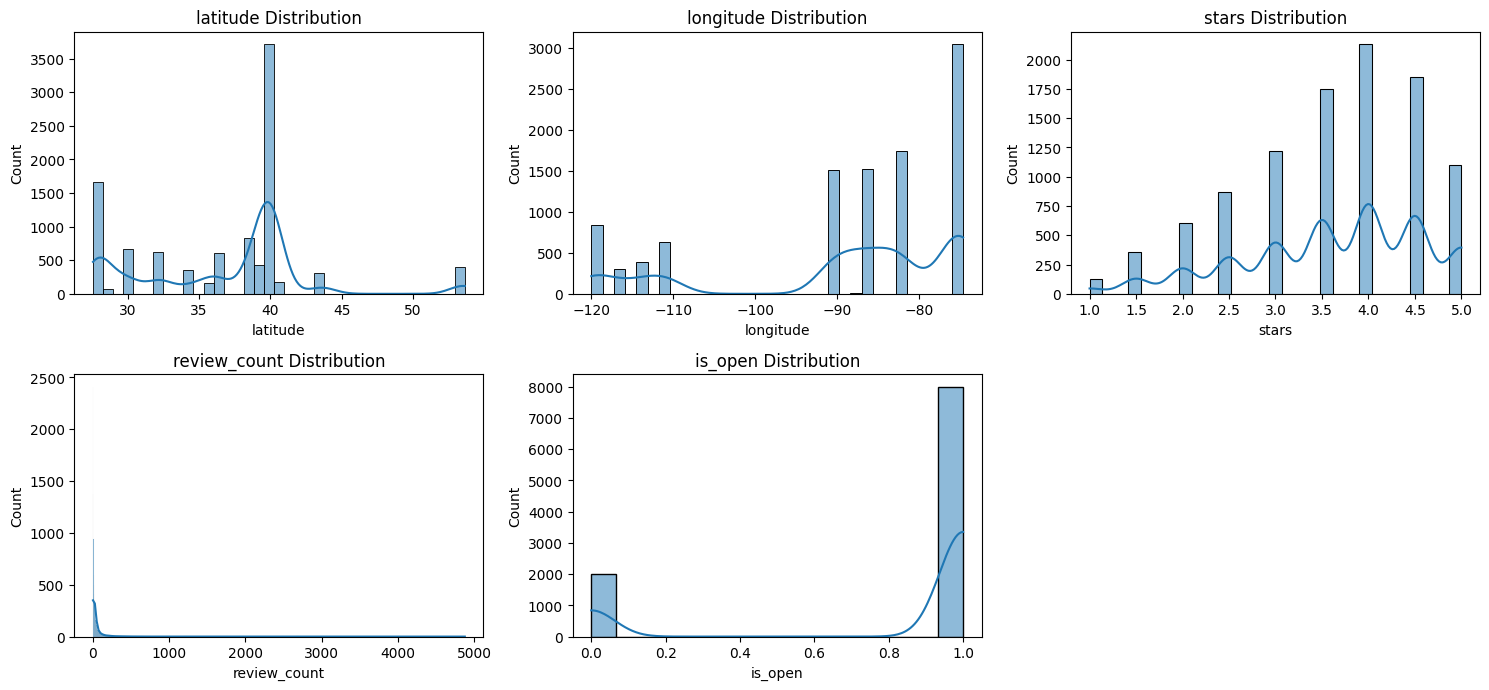

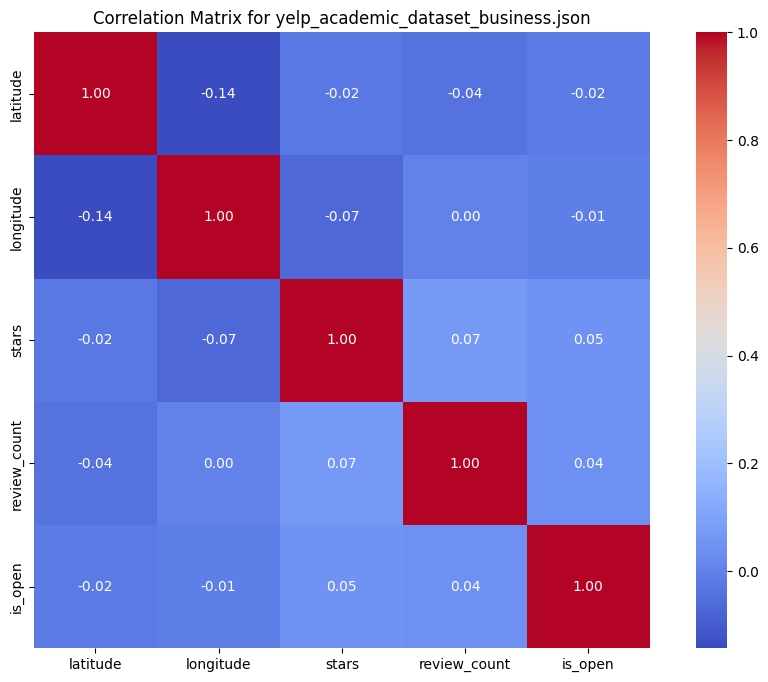


Missing Values in yelp_academic_dataset_review.json:
Empty DataFrame
Columns: [Count, Percentage]
Index: []

Data Types for yelp_academic_dataset_review.json:
review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

Basic Statistics for yelp_academic_dataset_review.json:
                     review_id                 user_id  \
count                    10000                   10000   
unique                   10000                    9549   
top     PBn41AU30uvYeTYiDdEXVA  lYQk0R6sPfo3WeX-l_5BuA   
freq                         1                       6   
mean                       NaN                     NaN   
min                        NaN                     NaN   
25%                        NaN                     NaN   
50%                        NaN     

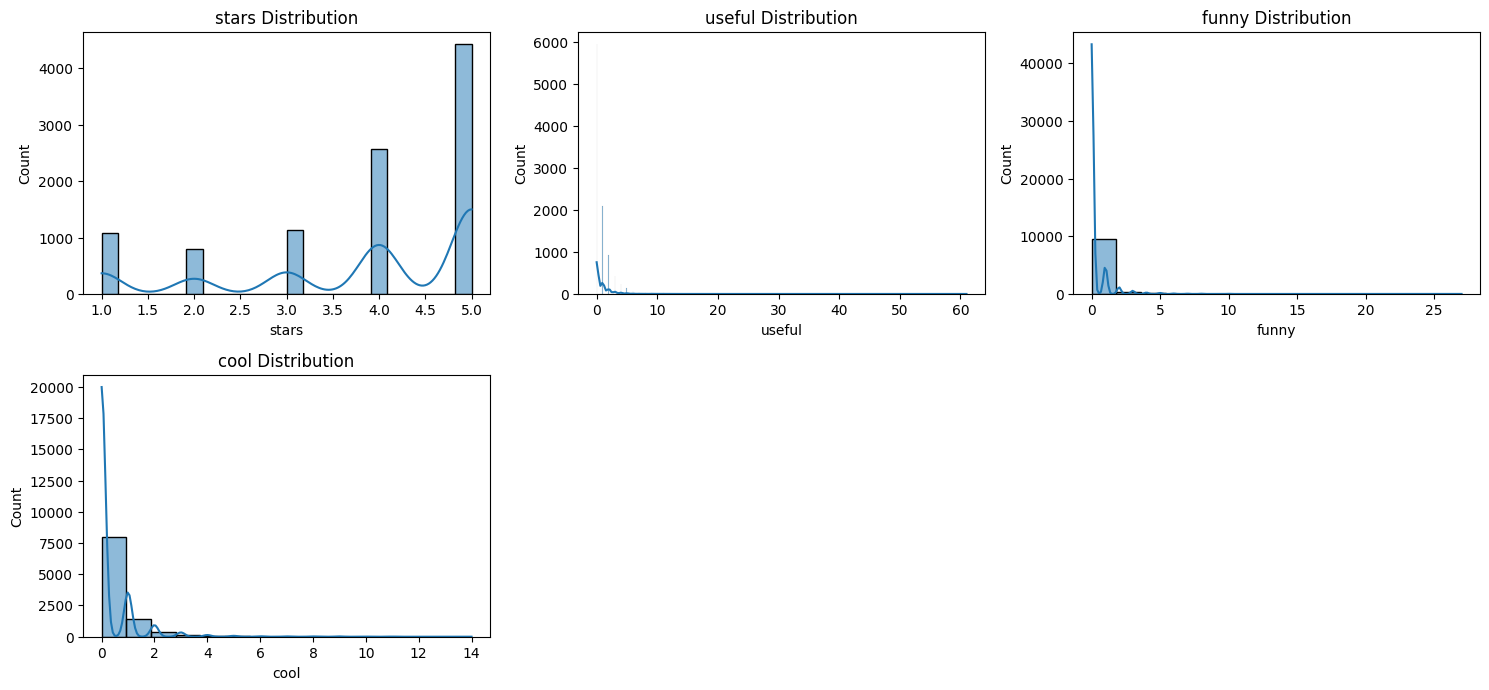

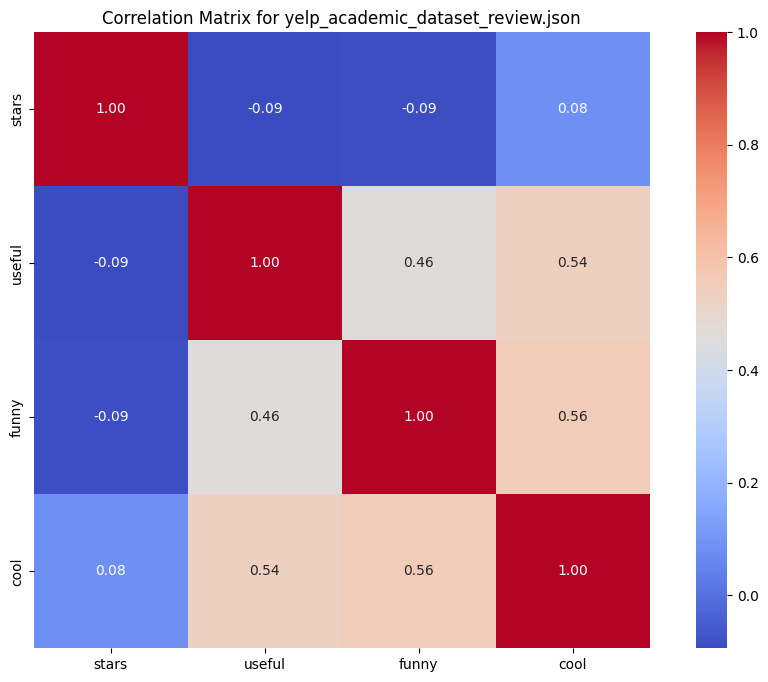


Missing Values in yelp_academic_dataset_user.json:
Empty DataFrame
Columns: [Count, Percentage]
Index: []

Data Types for yelp_academic_dataset_user.json:
user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object

Basic Statistics for yelp_academic_dataset_user.json:
                       user_id   name  review_count        yelping_since  \
count                    10000  10000  

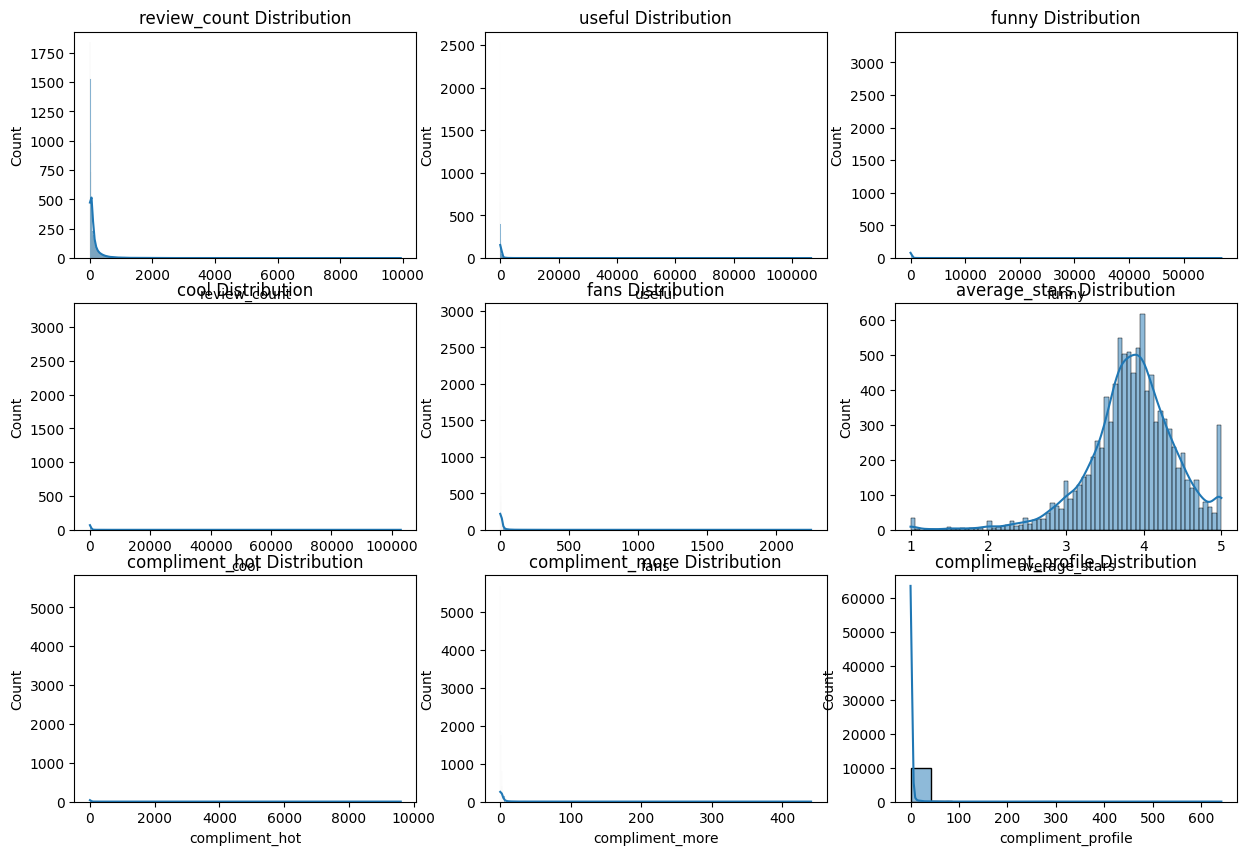

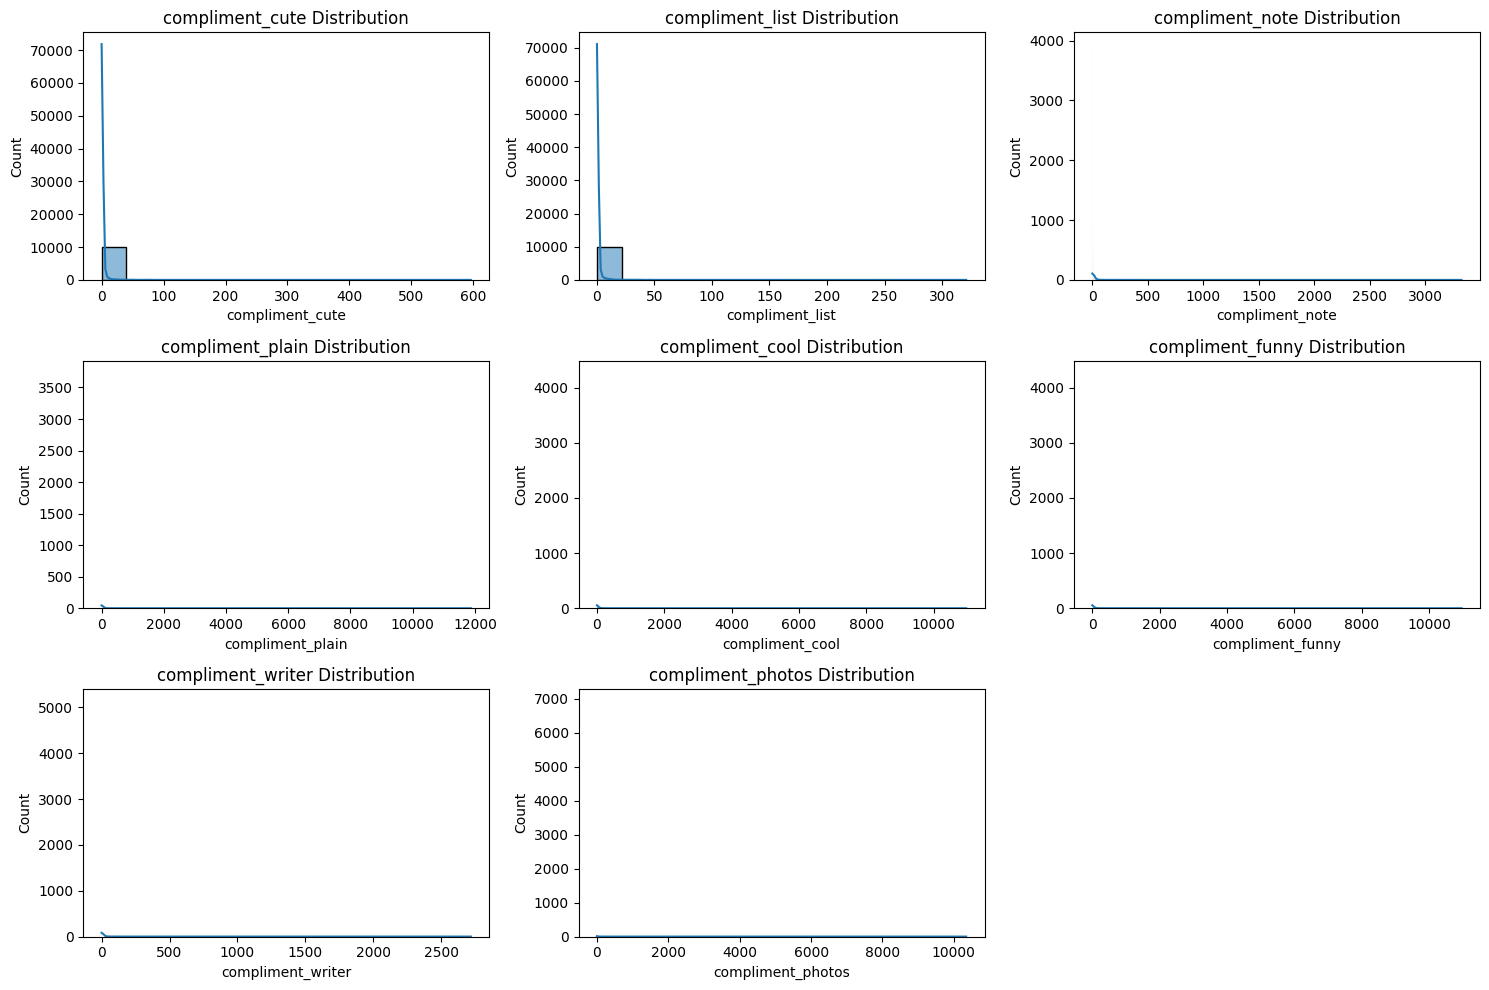

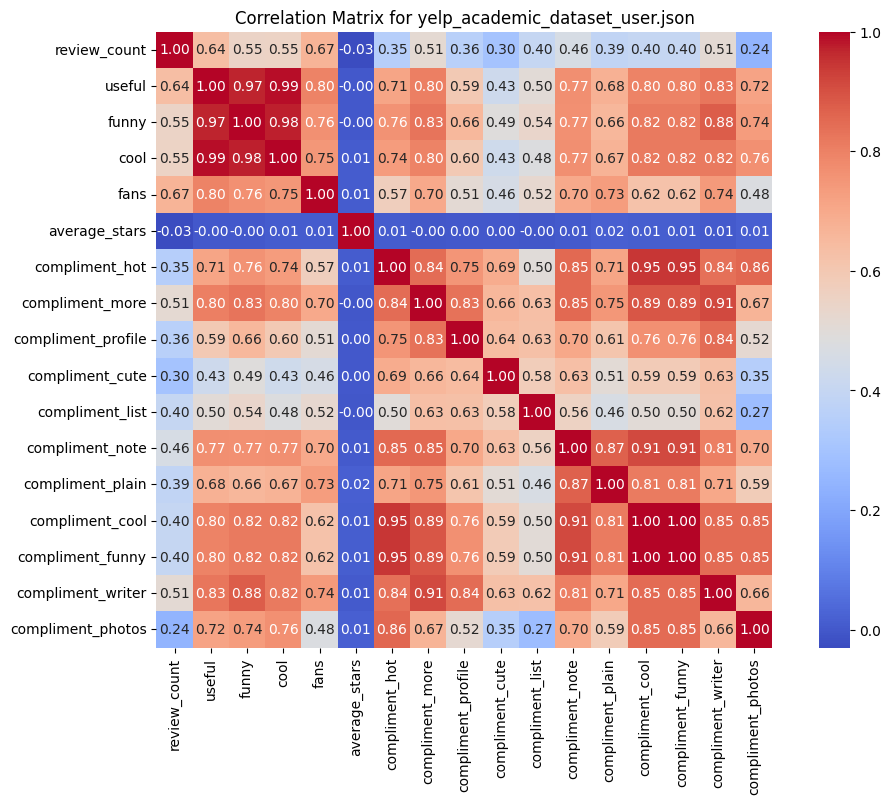


Missing Values in yelp_academic_dataset_checkin.json:
Empty DataFrame
Columns: [Count, Percentage]
Index: []

Data Types for yelp_academic_dataset_checkin.json:
business_id    object
date           object
dtype: object

Basic Statistics for yelp_academic_dataset_checkin.json:
                   business_id  \
count                    10000   
unique                   10000   
top     F9uM_Xa6zkweYQxImQpiAg   
freq                         1   

                                                     date  
count                                               10000  
unique                                              10000  
top     2017-05-24 22:03:33, 2017-11-17 18:43:53, 2018...  
freq                                                    1  


<Figure size 640x480 with 0 Axes>

No numeric data available for correlation in yelp_academic_dataset_checkin.json.

Missing Values in yelp_academic_dataset_tip.json:
Empty DataFrame
Columns: [Count, Percentage]
Index: []

Data Types for yelp_academic_dataset_tip.json:
user_id                     object
business_id                 object
text                        object
date                datetime64[ns]
compliment_count             int64
dtype: object

Basic Statistics for yelp_academic_dataset_tip.json:
                       user_id             business_id   text  \
count                    10000                   10000  10000   
unique                    6274                    7962   9941   
top     5Y5KbsI5buMcNh2hTFaRpA  QHWYlmVbLC3K6eglWoHVvA  Yummy   
freq                        44                      11      8   
mean                       NaN                     NaN    NaN   
min                        NaN                     NaN    NaN   
25%                        NaN                     NaN    NaN   
50

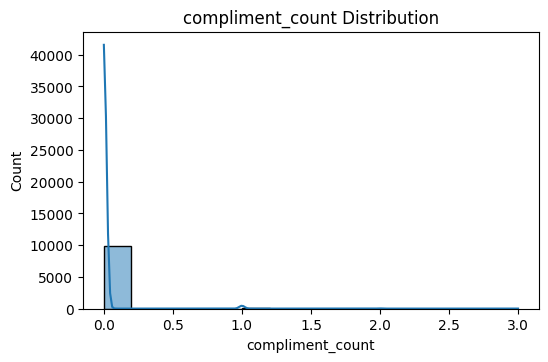

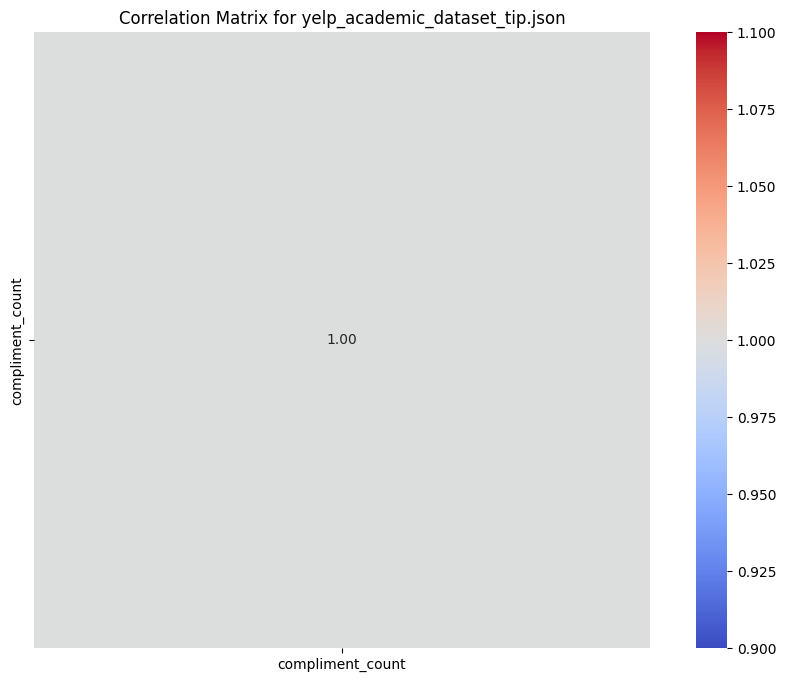

In [3]:
folder_path = '../data/'
transit_bucket = 'raw_datasets/'
target_bucket = 'yelp/'

files_list = [
    'yelp_academic_dataset_business.json',
    'yelp_academic_dataset_review.json',
    'yelp_academic_dataset_user.json',
    'yelp_academic_dataset_checkin.json',
    'yelp_academic_dataset_tip.json',
    'yelp_academic_dataset_photo.json'
]

max_records = 10000  # Set the maximum number of records to sample from each dataset
nrows = 50000  # Set the maximum number of records to load from each dataset
evaluate_datasets(folder_path, transit_bucket, target_bucket, files_list, max_records, nrows)